In [1]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *

Welcome to JupyROOT 6.23/01


In [243]:
dwarf = "segue_1"
decay = "tt"
package = "EventDisplay"
sigma = -23.8

#23.8, 22.8, 21.6

hOn, hOff, Non, Noff, events, alpha = Likelihood.eventdisplay.readData(dwarf, addTheta=True, full_output=True)

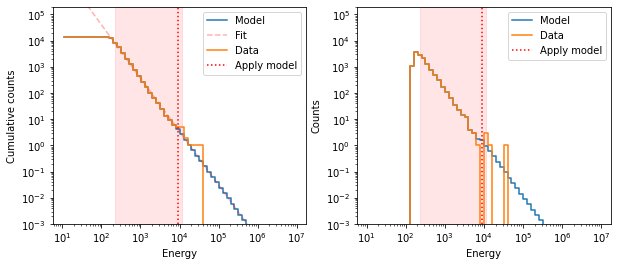

In [191]:
testModel = lambda x, N, a, b: N*np.exp(1./(1./x**a+1./x**(-b)))

bkg = events[events[:,2] == 0.0][:,0]
y, x = np.histogram(bkg, bins=const.energyEdges)
cumy= np.cumsum(y[::-1])[::-1]
#cond = (cumy>min((max(cumy)*0.01), 4))*(np.arange(0,len(y))>(y.argmax()+1))
cond = (cumy>min((max(cumy)*0.05), 2))*(np.arange(0,len(y))>=(y.argmax()+1))
selectedx = center_pt(x)[cond]
selectedy = cumy[cond]

pfit = np.poly1d(np.polyfit(np.log10(selectedx), np.log10(selectedy), 1))
diff = abs((10**pfit(np.log10(center_pt(x))) - cumy)[cond])
eStart = selectedx[diff.argmin()]
apply_bins = np.asarray(((range(len(y))>y.argmax())*(y==0))+(center_pt(x) > eStart))
temp = [False]
for i, b in enumerate(apply_bins[1:]):
    if (temp[i] == True)*(b==False):
        temp.append(not(b))
    else:
        temp.append(b)
apply_bins = np.asarray(temp)
#fCumy = np.asarray(list(cumy[center_pt(x)<eStart])+list(10**pfit(np.log10(center_pt(x)))[center_pt(x)>=eStart]))
fCumy = np.asarray(list(cumy[~apply_bins])+list(10**pfit(np.log10(center_pt(x)))[apply_bins]))
cnts = list(np.diff(fCumy[::-1])[::-1])+[0]


f, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].step(center_pt(x), fCumy, where="mid", label="Model")
ax[0].plot(center_pt(x), 10**pfit(np.log10(center_pt(x))), ls="--", alpha=0.3, color="r", label="Fit")
ax[0].step(center_pt(x), cumy, where="mid", label="Data")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Energy")
ax[0].set_ylabel("Cumulative counts")
ax[0].axvline(center_pt(x)[apply_bins][0], ls=":", color="r", label="Apply model")
maxy = 2*10**(round(np.log10(max(cumy)))+1)
ax[0].fill_betweenx([1e-3, maxy], selectedx[0], selectedx[-1], color="r", alpha=0.1)
ax[0].set_ylim(1e-3, maxy)
ax[0].legend()

ax[1].step(center_pt(x), cnts, where="mid", label="Model")
ax[1].step(center_pt(x), y, where="mid", label="Data")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("Energy")
ax[1].set_ylabel("Counts")
ax[1].axvline(center_pt(x)[apply_bins][0], ls=":", color="r", label="Apply model")
maxy = 2*10**(round(np.log10(max(y)))+1)
ax[1].fill_betweenx([1e-3, maxy], selectedx[0], selectedx[-1], color="r", alpha=0.1)
ax[1].set_ylim(1e-3, maxy)
ax[1].legend()

plt.show(block=False)


In [211]:
hOn, hOff = Likelihood.EventDisplay.readData("segue_1", ext=True)
hOn, hOff_ex = Likelihood.EventDisplay.readData("segue_1", bkgModel="ex", ext=True)

(<cppyy.gbl.TCanvas object at 0x7fa5b1dd2160>,
 <cppyy.gbl.TH1D object at 0x7fa5d0e75410>)

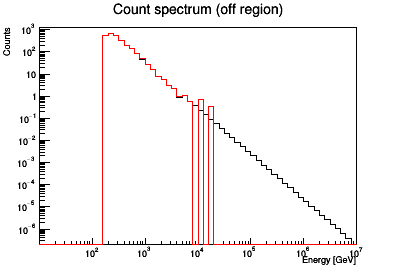

In [213]:
plotRoot(hOff_ex, hOff, logx=True, logy=True)


(<cppyy.gbl.TCanvas object at 0x7fa5b7616d00>,
 <cppyy.gbl.TH1D object at 0x7fa5b1db1240>)

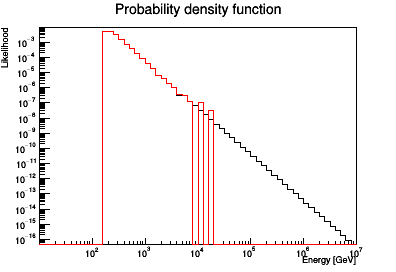

In [214]:
plotRoot(convertToPDF(hOff_ex), convertToPDF(hOff), logx=True, logy=True)


In [218]:
events = Likelihood.EventDisplay.readData("segue_1", rawdata=True, ext=True)

Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hOff (Potential memory leak).


In [219]:
events

array([[1.71463346e+02, 7.13634744e-03, 1.00000000e+00, ...,
        2.28311627e-02, 1.00000000e+00, 1.00000000e+00],
       [7.24510354e+02, 1.40496923e-02, 1.00000000e+00, ...,
        6.99046735e-01, 1.00000000e+00, 1.00000000e+00],
       [2.97709434e+02, 1.26621366e-02, 1.00000000e+00, ...,
        1.23635401e-01, 1.00000000e+00, 1.00000000e+00],
       ...,
       [3.47860256e+02, 1.53317125e-02, 0.00000000e+00, ...,
        3.55643256e-02, 1.00000000e+00, 1.00000000e+00],
       [1.04469889e+03, 5.12953216e-03, 0.00000000e+00, ...,
        6.40219452e-02, 1.00000000e+00, 1.00000000e+00],
       [2.70649890e+02, 1.16738909e-02, 0.00000000e+00, ...,
        1.50543223e-02, 1.00000000e+00, 1.00000000e+00]])

In [229]:
poff = []
poff_ex = []
for e in events:
    if e[2] == 0.:
        poff.append(np.log(pdf.Interpolate(e[0])))
        poff_ex.append(np.log(pdf_ex.Interpolate(e[0])))

In [230]:
sum(poff)

-93530.44007641605

In [231]:
sum(poff_ex)

-93534.00697841741

In [220]:
pdf_ex = convertToPDF(hOff_ex)
pdf = convertToPDF(hOff)

In [ ]:
for 

In [217]:
pdf.Interpolate(1e4)

4.7068636562848456e-08

In [185]:
def bkgModel(x, x0, idx, cutoff):
    belowCut = (np.asarray(x) < cutoff)
    y1 = idx*(x[belowCut]-x0)
    y2 = idx*(cutoff-x0)-1+(np.exp(-(x[~belowCut]-cutoff)))
    y = np.asarray(y1.tolist()+y2.tolist())
    return y
    

In [186]:
x=np.linspace(1, 10, 100)

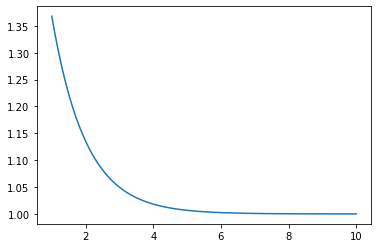

In [187]:
plt.plot(x, np.exp(-x)+1)

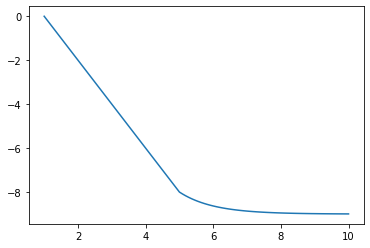

In [188]:
plt.plot(x, bkgModel(x, 1, -2, 5))

In [133]:
from scipy.optimize import curve_fit

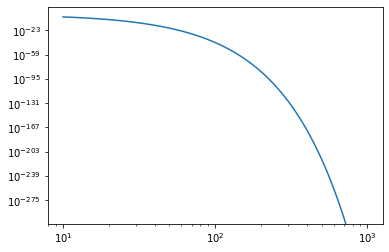

In [134]:
plt.plot(x, testModel(x, 1, 2, 1))
plt.xscale("log")
plt.yscale("log")

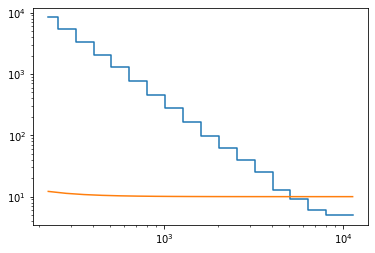

In [96]:
plt.step(selectedx, selectedy, where="mid")
plt.plot(selectedx, testModel(selectedx, 10, 10, 2))
plt.xscale("log")
plt.yscale("log")

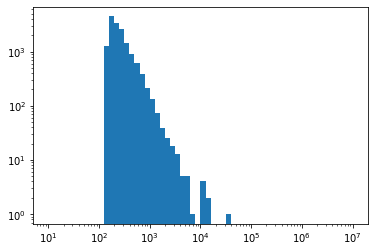

In [19]:
plt.hist(events[:,0], bins=const.energyEdges)
plt.xscale("log")
plt.yscale("log")

In [ ]:
events[:,0]

In [280]:
2*0.5*0.25/0.008

31.25

In [233]:
thbins

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

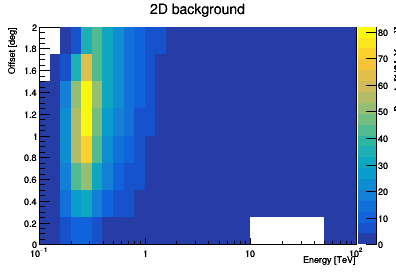

In [275]:
from astropy.io import fits

bkg = fits.open(DATA_DIR+"/bkg_model/bkg2d_az_selection100,200_zenith_(15, 20).fits")

ebins = np.asarray(list(bkg[1].data["ENERG_LO"][0])+[bkg[1].data["ENERG_HI"][0][-1]])
thbins = np.asarray(list(bkg[1].data["THETA_LO"][0])+[bkg[1].data["THETA_HI"][0][-1]])

bkg_tobias = TH2D("BKG", "BKG", len(ebins)-1, ebins, len(thbins)-1, thbins)
bkg_tobias.SetTitle("2D background")
bkg_tobias.GetXaxis().SetTitle("Energy [TeV]")
bkg_tobias.GetYaxis().SetTitle("Offset [deg]")
bkg_tobias.GetZaxis().SetTitle("Counts [1/(MeV s sr)]")
bkg_tobias.SetDirectory(0)

for i, data in enumerate(bkg[1].data["BKG"][0]):
    for j, cnt in enumerate(data):
        dOmega = bkg_tobias.GetYaxis().GetBinCenter(i+1)*bkg_tobias.GetYaxis().GetBinWidth(i+1)*2*np.pi
        dE = bkg_tobias.GetXaxis().GetBinWidth(j+1)*1e6
        bkg_tobias.SetBinContent(j+1, i+1, cnt*dOmega*dE)

c, t = plotRoot(bkg_tobias, logx=True)
#c.SetLogz()

In [276]:

y, x = np.histogram(events[:,0], bins=const.energyEdges)
cnts = []
for e in center_pt(x):
    cnts.append([e, bkg_tobias.Interpolate(e/1e3, 0.5)])
    
cnts = np.asarray(cnts)

Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpolate>: Cannot interpolate outside histogram domain.
Error in <TH2D::Interpola

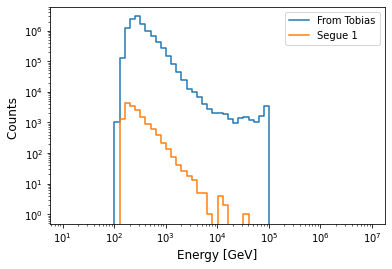

In [285]:
plt.step(cnts[:,0], cnts[:,1]*372714.0*6*0.008/(2*0.5*0.25), where="mid", label="From Tobias")

plt.step(center_pt(x), y, where="mid", label="Segue 1")
plt.xlabel("Energy [GeV]", fontsize=12)
plt.ylabel("Counts ", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.legend()


In [257]:
t = y/(cnts[:,1]*372714.0)

<ipython-input-257-8888d271003b>:1: RuntimeWarning: invalid value encountered in true_divide
  t = y/(cnts[:,1]*372714.0)


In [260]:
t = t[np.isfinite(t)*(t!=0)]

In [262]:
np.average(t)

0.00010614745927505279

In [240]:
irf = ResponseFunction.EventDisplay.averagedIRFs(dwarf)

In [241]:
irf.exposure

372714.0

In [26]:
energies

array([1.00000000e+01, 1.25892541e+01, 1.58489319e+01, 1.99526231e+01,
       2.51188643e+01, 3.16227766e+01, 3.98107171e+01, 5.01187234e+01,
       6.30957344e+01, 7.94328235e+01, 1.00000000e+02, 1.25892541e+02,
       1.58489319e+02, 1.99526231e+02, 2.51188643e+02, 3.16227766e+02,
       3.98107171e+02, 5.01187234e+02, 6.30957344e+02, 7.94328235e+02,
       1.00000000e+03, 1.25892541e+03, 1.58489319e+03, 1.99526231e+03,
       2.51188643e+03, 3.16227766e+03, 3.98107171e+03, 5.01187234e+03,
       6.30957344e+03, 7.94328235e+03, 1.00000000e+04, 1.25892541e+04,
       1.58489319e+04, 1.99526231e+04, 2.51188643e+04, 3.16227766e+04,
       3.98107171e+04, 5.01187234e+04, 6.30957344e+04, 7.94328235e+04,
       1.00000000e+05, 1.25892541e+05, 1.58489319e+05, 1.99526231e+05,
       2.51188643e+05, 3.16227766e+05, 3.98107171e+05, 5.01187234e+05,
       6.30957344e+05, 7.94328235e+05, 1.00000000e+06, 1.25892541e+06,
       1.58489319e+06, 1.99526231e+06, 2.51188643e+06, 3.16227766e+06,
      